In [4]:
import numpy as np

import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

In [5]:
train_master = pd.read_csv('./PPD_Training_Master_GBK_3_1_Training_Set.csv', encoding='gbk')
train_loginfo = pd.read_csv ('./PPD_LogInfo_3_1_Training_Set.csv', encoding='gbk')
train_userinfo = pd.read_csv('./PPD_Userupdate_Info_3_1_Training_Set.csv', encoding='gbk')

In [8]:
train_master.shape

(30000, 228)

In [9]:
train_loginfo.shape

(580551, 5)

In [10]:
train_userinfo.shape

(372463, 4)

In [11]:
train_master.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,222,-1,0,0,0,0,0,1,0,2014-3-5
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,1,-1,0,0,0,0,0,2,0,2014-2-26
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,-1,-1,-1,1,0,0,0,0,0,2014-2-28
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,-1,-1,-1,0,0,0,0,0,0,2014-2-25
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,-1,-1,-1,0,0,0,0,0,0,2014-2-27


In [12]:
train_master.isnull().any()

Idx                           False
UserInfo_1                     True
UserInfo_2                     True
UserInfo_3                     True
UserInfo_4                     True
WeblogInfo_1                   True
WeblogInfo_2                   True
WeblogInfo_3                   True
WeblogInfo_4                   True
WeblogInfo_5                   True
WeblogInfo_6                   True
WeblogInfo_7                  False
WeblogInfo_8                  False
WeblogInfo_9                  False
WeblogInfo_10                 False
WeblogInfo_11                 False
WeblogInfo_12                 False
WeblogInfo_13                 False
WeblogInfo_14                 False
WeblogInfo_15                 False
WeblogInfo_16                 False
WeblogInfo_17                 False
WeblogInfo_18                 False
UserInfo_5                    False
UserInfo_6                    False
UserInfo_7                    False
UserInfo_8                    False
UserInfo_9                  

In [13]:
# 删除缺失值多的列
null_sum = train_master.isnull().sum()
null_sum = null_sum[null_sum!=0]
null_sum_df = DataFrame(null_sum, columns=['num'])
null_sum_df['ratio'] = null_sum_df['num'] / 30000.0
null_sum_df.sort_values(by='ratio', ascending=False, inplace=True)

In [14]:
null_sum_df

,num,ratio
WeblogInfo_3,29030,0.967667
WeblogInfo_1,29030,0.967667
UserInfo_11,18909,0.630300
UserInfo_13,18909,0.630300
UserInfo_12,18909,0.630300
WeblogInfo_20,8050,0.268333
WeblogInfo_21,3074,0.102467
WeblogInfo_19,2963,0.098767
WeblogInfo_2,1658,0.055267
WeblogInfo_4,1651,0.055033


In [15]:
train_master.drop(['WeblogInfo_3', 'WeblogInfo_1', 'UserInfo_11', 'UserInfo_13', 'UserInfo_12', 'WeblogInfo_20'],
                  axis=1, inplace=True)

In [16]:
record_nan = train_master.isnull().sum(axis=1).sort_values(ascending=False)

In [17]:
record_nan

29341    33
18637    31
17386    31
29130    31
29605    31
8754     31
13001    31
28087    31
17857    31
11956    31
20566    31
28020    31
20233    31
9603     31
20986    29
25593    29
22520    29
21687    29
20046    29
17349    29
27463    29
22749    29
19411    29
20477    29
24431    29
29929    29
20080    29
22635    29
18216    28
21358    28
         ..
17559     0
17560     0
17561     0
17562     0
17539     0
17537     0
17511     0
17536     0
17512     0
17513     0
17515     0
17516     0
17517     0
17518     0
17519     0
17520     0
17521     0
17522     0
17523     0
17524     0
17525     0
17526     0
17527     0
17528     0
17529     0
17531     0
17532     0
17533     0
17534     0
0         0
Length: 30000, dtype: int64

In [18]:
# 缺失值大于5个的行
drop_record_index = [i for i in record_nan.loc[(record_nan>=5)].index]

In [19]:
drop_record_index

[29341,
 18637,
 17386,
 29130,
 29605,
 8754,
 13001,
 28087,
 17857,
 11956,
 20566,
 28020,
 20233,
 9603,
 20986,
 25593,
 22520,
 21687,
 20046,
 17349,
 27463,
 22749,
 19411,
 20477,
 24431,
 29929,
 20080,
 22635,
 18216,
 21358,
 19258,
 29686,
 19682,
 28065,
 3131,
 27774,
 27356,
 23939,
 16530,
 18978,
 7334,
 905,
 9852,
 19968,
 17260,
 10041,
 5226,
 15707,
 14374,
 10211,
 19315,
 13380,
 590,
 18270,
 22022,
 23745,
 5304,
 21510,
 14107,
 416,
 7174,
 658,
 15812,
 22615,
 16990,
 5145,
 23913,
 12264,
 15193,
 14494,
 16821,
 27709,
 12479,
 26083,
 11373,
 14747,
 9693,
 16028,
 18304,
 2202,
 4233,
 8839,
 6815,
 26539,
 14308,
 15060,
 7329,
 14309,
 23097,
 5150,
 27493,
 17486,
 10574,
 9485,
 17801,
 16436,
 11294,
 11185,
 12365,
 13061,
 10367,
 19665,
 19354,
 17129,
 12652,
 20326,
 22460,
 18827,
 19671,
 2007,
 10882,
 11996,
 28403,
 19167,
 7977,
 19914,
 28121,
 15720,
 18821,
 20722,
 26392,
 13052,
 1720,
 13274,
 20488,
 2288,
 22692,
 20335,
 454,

In [20]:
# 删除缺失值多的行
print('before train_master shape {}'.format(train_master.shape))
train_master.drop(drop_record_index, inplace=True)
print('after train_master shape {}'.format(train_master.shape))

before train_master shape (30000, 222)
after train_master shape (29189, 222)


In [22]:
pd.value_counts(train_master['UserInfo_1'], ascending=False)

1.0    9724
3.0    5898
5.0    5665
4.0    4770
6.0    2351
7.0     676
2.0     103
0.0       1
Name: UserInfo_1, dtype: int64

In [23]:
print('before all nan num: {}'.format(train_master.isnull().sum().sum()))

train_master.loc[train_master['UserInfo_2'].isnull(), 'UserInfo_2'] = '位置地点'
train_master.loc[train_master['UserInfo_4'].isnull(), 'UserInfo_4'] = '位置地点'

def fill_nan(f, method):
    if method == 'most':
        common_value = pd.value_counts(train_master[f], ascending=False).index[0]
    else:
        common_value = train_master[f].mean()
    train_master.loc[train_master[f].isnull(), f] = common_value

# 通过pd.value_counts(train_master[f])的观察得到经验
fill_nan('UserInfo_1', 'most')
fill_nan('UserInfo_3', 'most')
fill_nan('WeblogInfo_2', 'most')
fill_nan('WeblogInfo_4', 'mean')
fill_nan('WeblogInfo_5', 'mean')
fill_nan('WeblogInfo_6', 'mean')
fill_nan('WeblogInfo_19', 'most')
fill_nan('WeblogInfo_21', 'most')

print('after all nan num: {}'.format(train_master.isnull().sum().sum()))

before all nan num: 9808
after all nan num: 0


In [26]:
train_master.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_2,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,...,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo
0,10001,1.0,深圳,4.0,深圳,1.0,1.000000,1.000000,1.000000,14,...,222,-1,0,0,0,0,0,1,0,2014-3-5
1,10002,1.0,温州,4.0,温州,0.0,1.000000,1.000000,1.000000,14,...,1,-1,0,0,0,0,0,2,0,2014-2-26
2,10003,1.0,宜昌,3.0,宜昌,0.0,2.000000,2.000000,2.000000,9,...,-1,-1,-1,1,0,0,0,0,0,2014-2-28
3,10006,4.0,南平,1.0,南平,0.0,3.027468,1.817292,2.950044,2,...,-1,-1,-1,0,0,0,0,0,0,2014-2-25
4,10007,5.0,辽阳,1.0,辽阳,0.0,1.000000,1.000000,1.000000,3,...,-1,-1,-1,0,0,0,0,0,0,2014-2-27


In [27]:
c_counts  = train_master['target'].value_counts()
c_counts

0    27041
1     2148
Name: target, dtype: int64

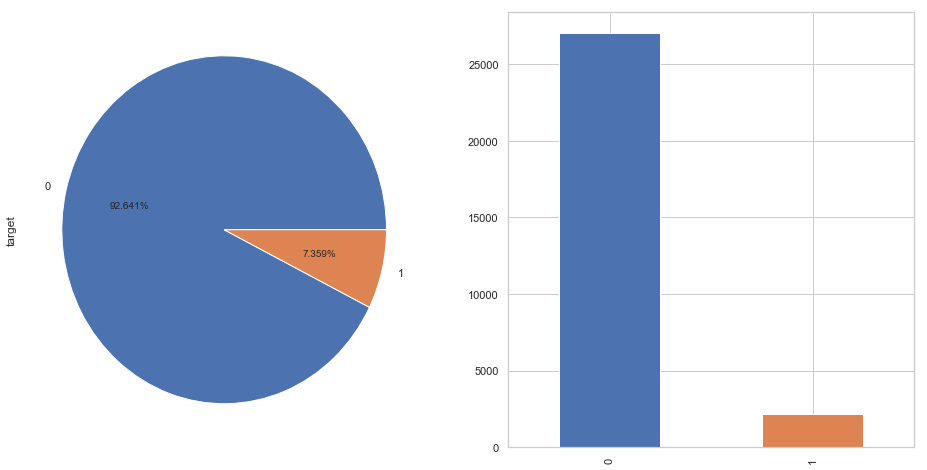

In [28]:
plt.figure(figsize=(16,8))
# 饼图
ax = plt.subplot(1,2,1)
c_counts.plot(kind = 'pie',autopct = '%0.3f%%',ax = ax)

# 柱状图
ax = plt.subplot(1,2,2)
c_counts.plot(kind = 'bar',ax = ax)

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
ratio_threshold = 0.5
binarized_features = []
binarized_features_most_freq_value = []

# 不同period的third_party_feature均值汇总在一起，结果并不好，故取消
# third_party_features = []
for f in train_master.columns:
    if f in ['target']:
        continue
        
#     if 'ThirdParty_Info_Period' in f:
#         third_party_features.append(f)
#         continue
    
    not_null_sum = (train_master[f].notnull()).sum()
    most_count = pd.value_counts(train_master[f], ascending=False).iloc[0]
    most_value = pd.value_counts(train_master[f], ascending=False).index[0]
    ratio = most_count / not_null_sum
    
    if ratio > ratio_threshold:
        binarized_features.append(f)
        binarized_features_most_freq_value.append(most_value)

numerical_features = [f for f in train_master.select_dtypes(exclude = ['object']).columns 
                      if f not in(['Idx', 'target']) 
                      and f not in binarized_features]
#                       and 'ThirdParty_Info_Period' not in f]
categorical_features = [f for f in train_master.select_dtypes(include = ["object"]).columns 
                        if f not in(['Idx', 'target']) 
                        and f not in binarized_features]
#                         and 'ThirdParty_Info_Period' not in f]

for i in range(len(binarized_features)):
    f = binarized_features[i]
    most_value = binarized_features_most_freq_value[i]
    train_master['b_' + f] = 1
    train_master.loc[train_master[f] == most_value, 'b_' + f] = 0
    train_master.drop([f], axis=1, inplace=True)

In [40]:
binarized_features

['WeblogInfo_2',
 'WeblogInfo_5',
 'WeblogInfo_8',
 'WeblogInfo_9',
 'WeblogInfo_10',
 'WeblogInfo_11',
 'WeblogInfo_12',
 'WeblogInfo_13',
 'WeblogInfo_14',
 'WeblogInfo_15',
 'WeblogInfo_18',
 'UserInfo_5',
 'UserInfo_6',
 'UserInfo_9',
 'UserInfo_10',
 'UserInfo_16',
 'UserInfo_17',
 'UserInfo_21',
 'UserInfo_22',
 'UserInfo_23',
 'UserInfo_24',
 'Education_Info1',
 'Education_Info2',
 'Education_Info3',
 'Education_Info4',
 'Education_Info5',
 'Education_Info6',
 'Education_Info7',
 'Education_Info8',
 'WeblogInfo_19',
 'WeblogInfo_21',
 'WeblogInfo_23',
 'WeblogInfo_24',
 'WeblogInfo_25',
 'WeblogInfo_26',
 'WeblogInfo_27',
 'WeblogInfo_28',
 'WeblogInfo_29',
 'WeblogInfo_30',
 'WeblogInfo_31',
 'WeblogInfo_32',
 'WeblogInfo_33',
 'WeblogInfo_34',
 'WeblogInfo_35',
 'WeblogInfo_36',
 'WeblogInfo_37',
 'WeblogInfo_38',
 'WeblogInfo_39',
 'WeblogInfo_40',
 'WeblogInfo_41',
 'WeblogInfo_42',
 'WeblogInfo_43',
 'WeblogInfo_44',
 'WeblogInfo_45',
 'WeblogInfo_46',
 'WeblogInfo_47',
 'W

In [49]:
len(numerical_features)

97

In [42]:
categorical_features

['UserInfo_2',
 'UserInfo_4',
 'UserInfo_7',
 'UserInfo_8',
 'UserInfo_19',
 'UserInfo_20',
 'ListingInfo']

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
clf = GradientBoostingClassifier()

X_train = train_master[numerical_features]

y_train = train_master['target']
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [48]:
X_train.shape

(29189, 97)

In [50]:
feature_importances_ = clf.feature_importances_
feature_importances_

array([1.85550834e-02, 7.44685831e-03, 6.93835362e-03, 3.96884133e-02,
       8.90495258e-03, 2.96858785e-03, 7.87262548e-03, 2.01202978e-02,
       1.80168389e-02, 3.13351500e-02, 1.79491436e-03, 1.47071314e-02,
       6.36284988e-03, 1.79097073e-02, 1.24449576e-02, 1.75999242e-02,
       5.10945753e-03, 1.22573659e-02, 3.77974605e-03, 1.46017237e-02,
       8.23029801e-03, 2.85977827e-02, 1.73078865e-03, 5.45288789e-03,
       2.39801640e-02, 9.22458017e-03, 2.39249638e-02, 2.25790238e-03,
       9.88357360e-03, 2.50976341e-02, 8.11623179e-03, 1.19419101e-02,
       1.37464770e-02, 9.79974181e-03, 7.23776403e-03, 2.76579344e-02,
       7.05395065e-03, 6.36844540e-03, 8.08768113e-03, 1.23062331e-02,
       1.81938662e-02, 5.63163222e-03, 2.99885431e-02, 1.92186618e-02,
       7.98478448e-03, 7.33077776e-03, 1.71333945e-02, 1.30748017e-02,
       4.01252899e-03, 1.40185694e-02, 1.31338143e-03, 1.96059709e-03,
       1.90560505e-03, 1.95190862e-02, 9.36041060e-03, 5.17933594e-03,
      

In [51]:
cols = X_train.columns
cols

Index(['UserInfo_1', 'UserInfo_3', 'WeblogInfo_4', 'WeblogInfo_6',
       'WeblogInfo_7', 'WeblogInfo_16', 'WeblogInfo_17', 'UserInfo_14',
       'UserInfo_15', 'UserInfo_18', 'ThirdParty_Info_Period1_1',
       'ThirdParty_Info_Period1_2', 'ThirdParty_Info_Period1_3',
       'ThirdParty_Info_Period1_4', 'ThirdParty_Info_Period1_5',
       'ThirdParty_Info_Period1_6', 'ThirdParty_Info_Period1_7',
       'ThirdParty_Info_Period1_8', 'ThirdParty_Info_Period1_11',
       'ThirdParty_Info_Period1_13', 'ThirdParty_Info_Period1_14',
       'ThirdParty_Info_Period1_15', 'ThirdParty_Info_Period1_16',
       'ThirdParty_Info_Period1_17', 'ThirdParty_Info_Period2_1',
       'ThirdParty_Info_Period2_2', 'ThirdParty_Info_Period2_3',
       'ThirdParty_Info_Period2_4', 'ThirdParty_Info_Period2_5',
       'ThirdParty_Info_Period2_6', 'ThirdParty_Info_Period2_7',
       'ThirdParty_Info_Period2_8', 'ThirdParty_Info_Period2_11',
       'ThirdParty_Info_Period2_13', 'ThirdParty_Info_Period2_14',
      

In [52]:
index = feature_importances_.argsort()[::-1]
index

array([ 3, 63,  9, 42, 21, 35, 29, 24, 26,  7, 53, 43,  0, 40,  8, 13, 15,
       46, 56, 70, 66, 11, 19, 49, 32, 71, 84, 61, 47, 94, 14, 39, 17, 31,
       85, 89, 88, 82, 28, 33, 68, 54, 25, 77,  4, 60, 20, 30, 38, 44,  6,
       58, 79, 62, 73,  1, 45, 34, 80, 36,  2, 57, 78, 37, 12, 92, 41, 96,
       81, 23, 55, 16, 86, 48, 18, 69, 67, 76,  5, 83, 91, 72, 74, 93, 27,
       75, 59, 51, 52, 10, 22, 50, 87, 95, 64, 90, 65], dtype=int64)

In [62]:
cols[index]

Index(['WeblogInfo_6', 'ThirdParty_Info_Period4_15', 'UserInfo_18',
       'ThirdParty_Info_Period3_5', 'ThirdParty_Info_Period1_15',
       'ThirdParty_Info_Period2_15', 'ThirdParty_Info_Period2_6',
       'ThirdParty_Info_Period2_1', 'ThirdParty_Info_Period2_3', 'UserInfo_14',
       'ThirdParty_Info_Period4_2', 'ThirdParty_Info_Period3_6', 'UserInfo_1',
       'ThirdParty_Info_Period3_3', 'UserInfo_15', 'ThirdParty_Info_Period1_4',
       'ThirdParty_Info_Period1_6', 'ThirdParty_Info_Period3_11',
       'ThirdParty_Info_Period4_5', 'ThirdParty_Info_Period5_5',
       'ThirdParty_Info_Period5_1', 'ThirdParty_Info_Period1_2',
       'ThirdParty_Info_Period1_13', 'ThirdParty_Info_Period3_15',
       'ThirdParty_Info_Period2_11', 'ThirdParty_Info_Period5_6',
       'ThirdParty_Info_Period6_5', 'ThirdParty_Info_Period4_13',
       'ThirdParty_Info_Period3_13', 'ThirdParty_Info_Period6_15',
       'ThirdParty_Info_Period1_5', 'ThirdParty_Info_Period3_2',
       'ThirdParty_Info_Period1_8'

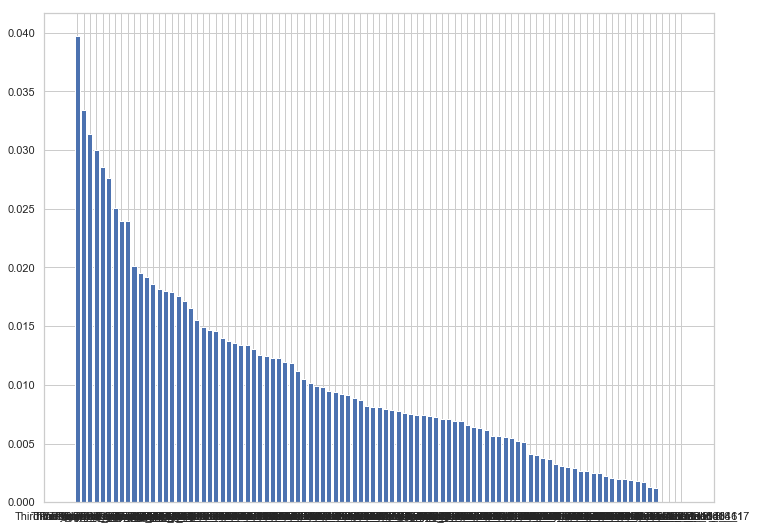

In [53]:
plt.figure(figsize=(12,9))
plt.bar(np.arange(len(index)),feature_importances_[index])

_ = plt.xticks(np.arange(len(index)),cols[index])

In [64]:
drops=['ThirdParty_Info_Period4_6', 'ThirdParty_Info_Period5_16',
       'ThirdParty_Info_Period2_17', 'ThirdParty_Info_Period1_3',
       'ThirdParty_Info_Period6_13', 'ThirdParty_Info_Period3_4',
       'ThirdParty_Info_Period6_17', 'ThirdParty_Info_Period6_2',
       'ThirdParty_Info_Period1_17', 'ThirdParty_Info_Period4_4',
       'ThirdParty_Info_Period1_7', 'ThirdParty_Info_Period6_7',
       'ThirdParty_Info_Period3_14', 'ThirdParty_Info_Period1_11',
       'ThirdParty_Info_Period5_4', 'ThirdParty_Info_Period5_2',
       'ThirdParty_Info_Period5_14', 'WeblogInfo_16',
       'ThirdParty_Info_Period6_4', 'ThirdParty_Info_Period6_12',
       'ThirdParty_Info_Period5_7', 'ThirdParty_Info_Period5_11',
       'ThirdParty_Info_Period6_14', 'ThirdParty_Info_Period2_4',
       'ThirdParty_Info_Period5_13', 'ThirdParty_Info_Period4_8',
       'ThirdParty_Info_Period3_17', 'ThirdParty_Info_Period4_1',
       'ThirdParty_Info_Period1_1', 'ThirdParty_Info_Period1_16',
       'ThirdParty_Info_Period3_16', 'ThirdParty_Info_Period6_8',
       'ThirdParty_Info_Period6_16', 'ThirdParty_Info_Period4_16',
       'ThirdParty_Info_Period6_11', 'ThirdParty_Info_Period4_17']

In [65]:
train_master = train_master.drop(labels=drops,axis = 1)
train_master.shape

(29160, 186)